# Coding Etiquette & Excel Reporting (3)
# (Part 1 - Q 6-9)¶

#### 1. Import libraries and data
#### 2. Create visualization for distribution of customer profile (Q6)
#### 3. Basic descriptive stat on customer profile (Q7)
#### 4. Compare customer profile with regions and departments(Q8)
#### 5. Export data

# 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create project folder path
path = r'C:\Users\Lara\Career Foundry Projects\21-09-2023 Instacart Basket Analysis'

In [3]:
# Import dataset instacart_high_act_users.pkl
df_all = pd.read_pickle (os.path.join (path, '02 Data','Prepared Data', 'instacart_customer_profile.pkl'))

In [4]:
# Check head() and info() of df_all
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,prices,price_range,...,marital_status,income,department,region,activity_flag,age_group,family_size,income_class,part_of_day,customer_profile
0,2539329,1,1,Monday,8,NaN,196,Soda,9.0,Mid-range product,...,married,40423,beverages,South,High-activity customer,Young adult,5,Low income class,Morning,Younger parent with low income
1,2398795,1,2,Tuesday,7,15.0,196,Soda,9.0,Mid-range product,...,married,40423,beverages,South,High-activity customer,Young adult,5,Low income class,Morning,Younger parent with low income
2,473747,1,3,Tuesday,12,21.0,196,Soda,9.0,Mid-range product,...,married,40423,beverages,South,High-activity customer,Young adult,5,Low income class,Mid-day,Younger parent with low income
3,2254736,1,4,Wednesday,7,29.0,196,Soda,9.0,Mid-range product,...,married,40423,beverages,South,High-activity customer,Young adult,5,Low income class,Morning,Younger parent with low income
4,431534,1,5,Wednesday,15,28.0,196,Soda,9.0,Mid-range product,...,married,40423,beverages,South,High-activity customer,Young adult,5,Low income class,Mid-day,Younger parent with low income


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30992664 entries, 0 to 32434207
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int16  
 3   orders_day_of_week      object 
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float32
 6   product_id              int32  
 7   product_name            object 
 8   prices                  float32
 9   price_range             object 
 10  busiest_days            object 
 11  busiest_period_of_day   object 
 12  max_order               int16  
 13  loyalty_flag            object 
 14  mean_price              float32
 15  spending_flag           object 
 16  median_days             float32
 17  order_frequency_flag    object 
 18  gender                  object 
 19  state                   object 
 20  age                     int8   
 21  number_of_dependants    int8   
 2

# 2. Create visualization for distribution of customer profile

### Create an appropriate visualization to show the distribution of profiles.

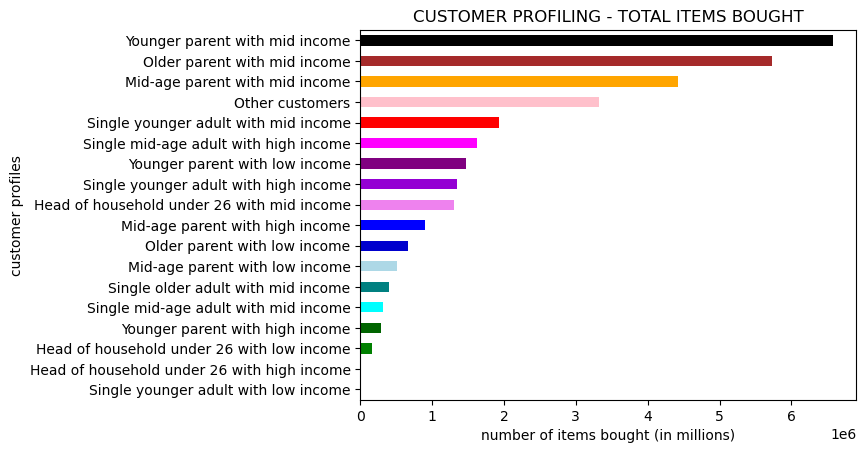

In [6]:
# Create bar chart for column 'customer_profile'
bar_cust_profile = df_all['customer_profile'].value_counts().sort_values(ascending = True).plot.barh(title = 'CUSTOMER PROFILING - TOTAL ITEMS BOUGHT', xlabel = 'number of items bought (in millions)', ylabel = 'customer profiles', color = ['yellow', 'lightgreen', 'green', 'darkgreen', 'cyan', 'teal', 'lightblue', 'mediumblue', 'blue', 'violet', 'darkviolet', 'purple', 'magenta', 'red', 'pink', 'orange', 'brown', 'black'])

In [7]:
# Save bar chart as png
bar_cust_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'), bbox_inches = 'tight')

# 3. Basic descriptive stat on customer profile

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [8]:
# max, min and mean by usage frequency and round to whole numbers because they represent number of orders
df_all.groupby('customer_profile').agg({'order_number':['min','mean','max']}).round(0)

order_number          
                                                     min  mean max
customer_profile                                                  
Head of household under 26 with high income            1  23.0  99
Head of household under 26 with low income             1  16.0  99
Head of household under 26 with mid income             1  18.0  99
Mid-age parent with high income                        1  18.0  99
Mid-age parent with low income                         1  17.0  99
Mid-age parent with mid income                         1  18.0  99
Older parent with low income                           1  17.0  99
Older parent with mid income                           1  18.0  99
Other customers                                        1  18.0  99
Single mid-age adult with high income                  1  18.0  99
Single mid-age adult with mid income                   1  18.0  99
Single older adult with mid income                     1  17.0  99
Single younger adult with high income                  1  18.0  99
Single younger adult with low income                   1   9.0  30
Single younger adult with mid income                   1  18.0  99
Younger parent with high income                        1  18.0  99
Younger parent with low income                         1  17.0  99
Younger parent with mid income                         1  18.0  99

In [9]:
# max, min and mean by expenditure and round to 2 decimals for numbers to mimic the look of prices
df_all.groupby('customer_profile').agg({'prices':['min','mean','max']}).round(2)

prices            
                                               min  mean   max
customer_profile                                              
Head of household under 26 with high income    1.0  7.92  25.0
Head of household under 26 with low income     1.0  6.86  25.0
Head of household under 26 with mid income     1.0  7.93  25.0
Mid-age parent with high income                1.0  7.94  25.0
Mid-age parent with low income                 1.0  6.50  25.0
Mid-age parent with mid income                 1.0  7.91  25.0
Older parent with low income                   1.0  6.51  25.0
Older parent with mid income                   1.0  7.91  25.0
Other customers                                1.0  7.96  25.0
Single mid-age adult with high income          1.0  7.96  25.0
Single mid-age adult with mid income           1.0  6.95  25.0
Single older adult with mid income             1.0  6.97  25.0
Single younger adult with high income          1.0  7.95  25.0
Single younger adult with low income           1.1  5.77  15.3
Single younger adult with mid income           1.0  7.67  25.0
Younger parent with high income                1.0  7.91  25.0
Younger parent with low income                 1.0  7.11  25.0
Younger parent with mid income                 1.0  7.94  25.0

#### Comment: Both aggregations showed that there is slight difference with customer groups with low income, namely the mean of prices and number of orders are lower than in rest of the groups which leads to conclusion that they generaly buy and spend less.

In [10]:
# Count distinct customers in each group of 'customer_profile' column
user_counts = df_all.groupby('customer_profile')['user_id'].nunique()

In [11]:
user_counts

customer_profile
Head of household under 26 with high income       53
Head of household under 26 with low income      1164
Head of household under 26 with mid income      6391
Mid-age parent with high income                 4485
Mid-age parent with low income                  4059
Mid-age parent with mid income                 22197
Older parent with low income                    5135
Older parent with mid income                   29171
Other customers                                16177
Single mid-age adult with high income           8040
Single mid-age adult with mid income            2173
Single older adult with mid income              2808
Single younger adult with high income           6685
Single younger adult with low income               6
Single younger adult with mid income           10610
Younger parent with high income                 1329
Younger parent with low income                  9726
Younger parent with mid income                 32424
Name: user_id, dtype: int64

#### Comment: Top 3 groups with most users are 3 groups representing parents with mid income.

# 4. Compare customer profile with regions and departments

In [12]:
# Set Jupyter display option to show all rows
pd.options.display.max_rows = None

In [13]:
# Create crosstab for columns 'customer_profile' and 'region'
crosstab1 = pd.crosstab(df_all['customer_profile'], df_all['region'])

In [14]:
crosstab1

region,Midwest,Northeast,South,West
customer_profile,,,,
Head of household under 26 with high income,3414,774,8570,4108
Head of household under 26 with low income,36078,28157,54760,47024
Head of household under 26 with mid income,312200,227852,442575,317099
Mid-age parent with high income,225104,154152,299220,229015
Mid-age parent with low income,111803,87201,175703,137286
Mid-age parent with mid income,1036175,802857,1439872,1139835
Older parent with low income,146830,118466,225686,166501
Older parent with mid income,1345282,1012683,1893541,1483608
Other customers,766167,605093,1111030,842246


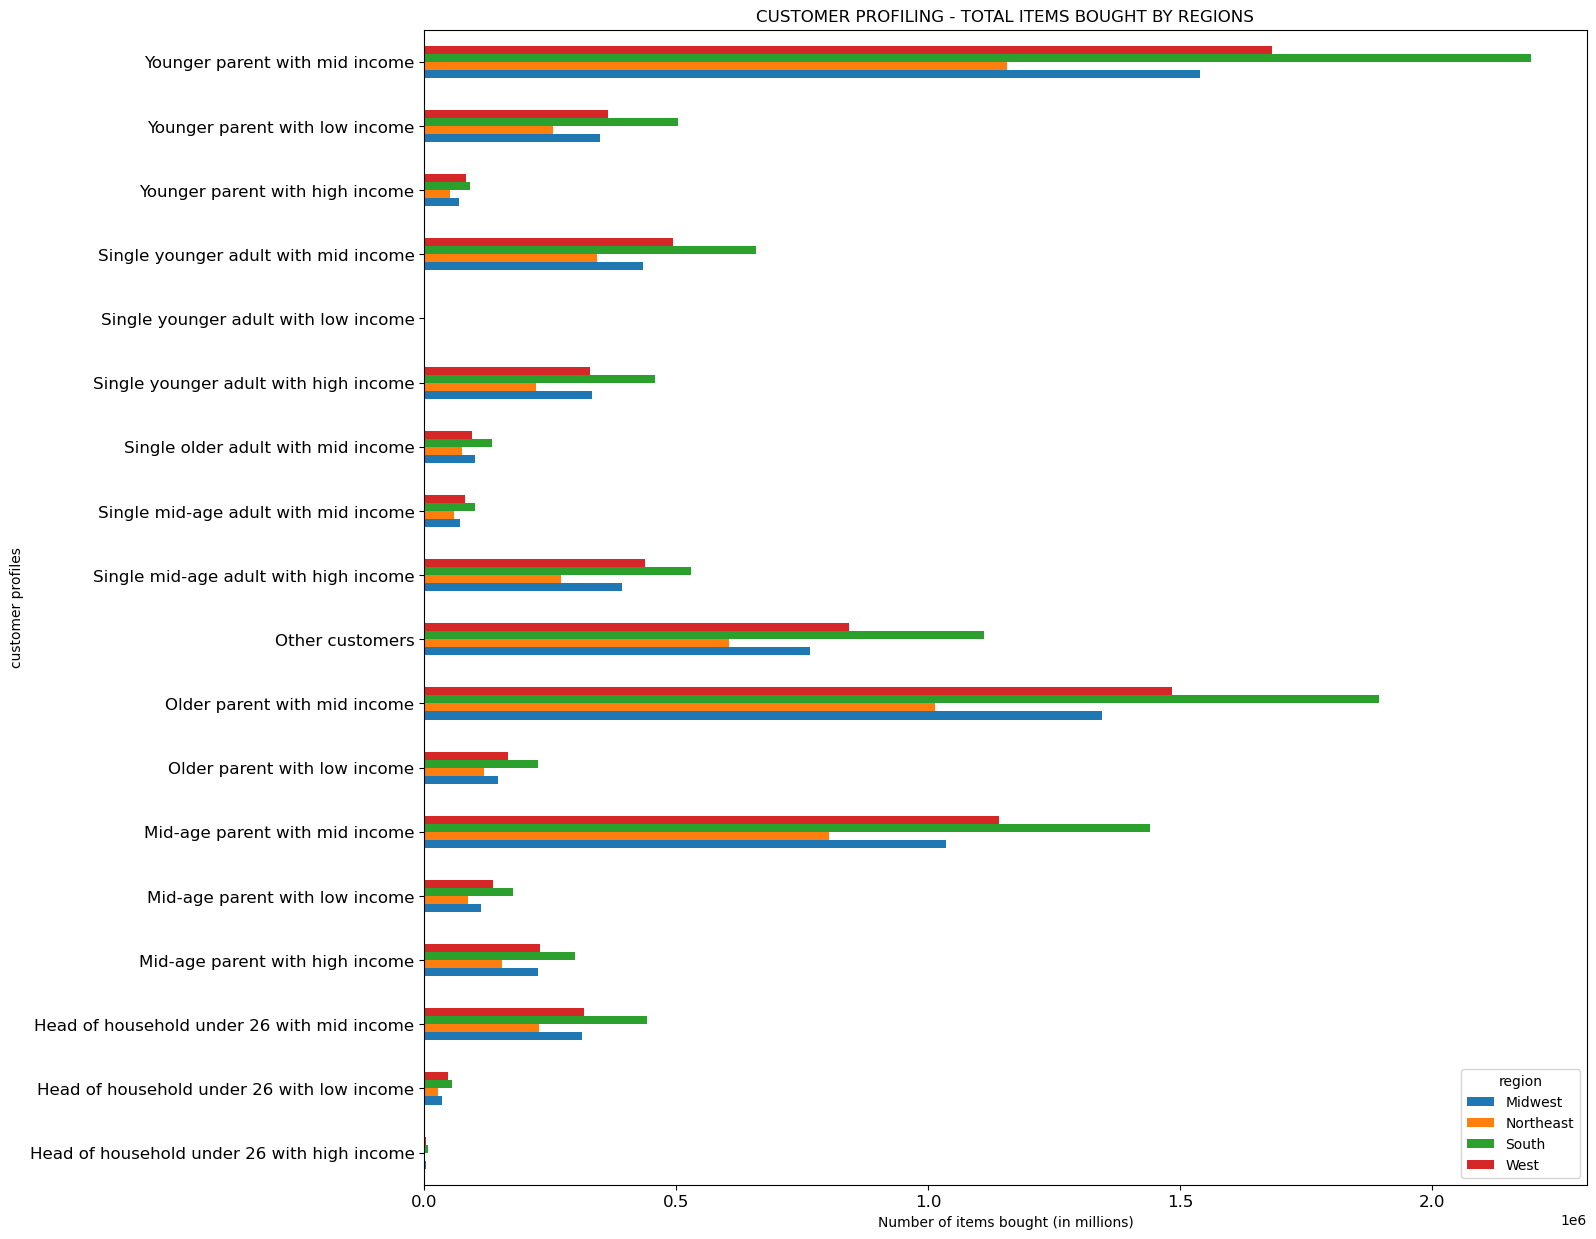

In [15]:
# Create bar chart from crosstab1
bar_items_cust_region = crosstab1.plot.barh(figsize = (15, 15), fontsize = 12, width = 0.5, rot = 0, title = 'CUSTOMER PROFILING - TOTAL ITEMS BOUGHT BY REGIONS', xlabel = 'Number of items bought (in millions)', ylabel = 'customer profiles')

In [16]:
# Save bar chart as png
bar_items_cust_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_items_customer_region.png'), bbox_inches = 'tight')

In [17]:
# Create crosstab for columns 'customer_profile' and 'department'
crosstab2 = pd.crosstab(df_all['customer_profile'], df_all['department'])

In [18]:
crosstab2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Head of household under 26 with high income,470,225,719,1309,409,2,695,3066,414,511,...,777,95,455,24,52,1107,362,79,3029,1414
Head of household under 26 with low income,933,1347,5495,17843,4374,259,4174,25820,5501,3325,...,4171,1170,1899,332,235,8269,2524,462,40112,26638
Head of household under 26 with mid income,6977,17809,47696,99956,28711,1372,43608,222142,42204,35706,...,28401,11129,29990,2961,1528,76484,17318,4797,387398,103258
Mid-age parent with high income,5425,11925,33715,72930,19420,927,31489,154601,28505,25389,...,20661,7867,21499,1951,975,54456,12542,2191,265564,71561
Mid-age parent with low income,2733,3631,16417,62171,14864,761,10502,73693,15877,9069,...,14020,2910,4293,1140,604,24568,7621,1137,121161,94215
Mid-age parent with mid income,19247,61984,161000,356833,94436,4594,148906,743310,142242,121388,...,98333,37502,101629,9530,4976,257933,61964,13950,1314993,358121
Older parent with low income,3762,5190,20314,80499,19190,1032,14456,94856,20240,11651,...,17394,3790,5154,1202,709,31538,9152,1544,159041,115012
Older parent with mid income,23332,77994,208516,455820,120011,6101,193286,970041,186481,156024,...,128527,48190,132963,12095,6159,334924,76829,17421,1719011,465663
Other customers,16749,45838,125234,264919,70530,3336,111349,564279,109815,91166,...,74004,27954,79222,6520,3826,194948,45260,10410,985791,260415


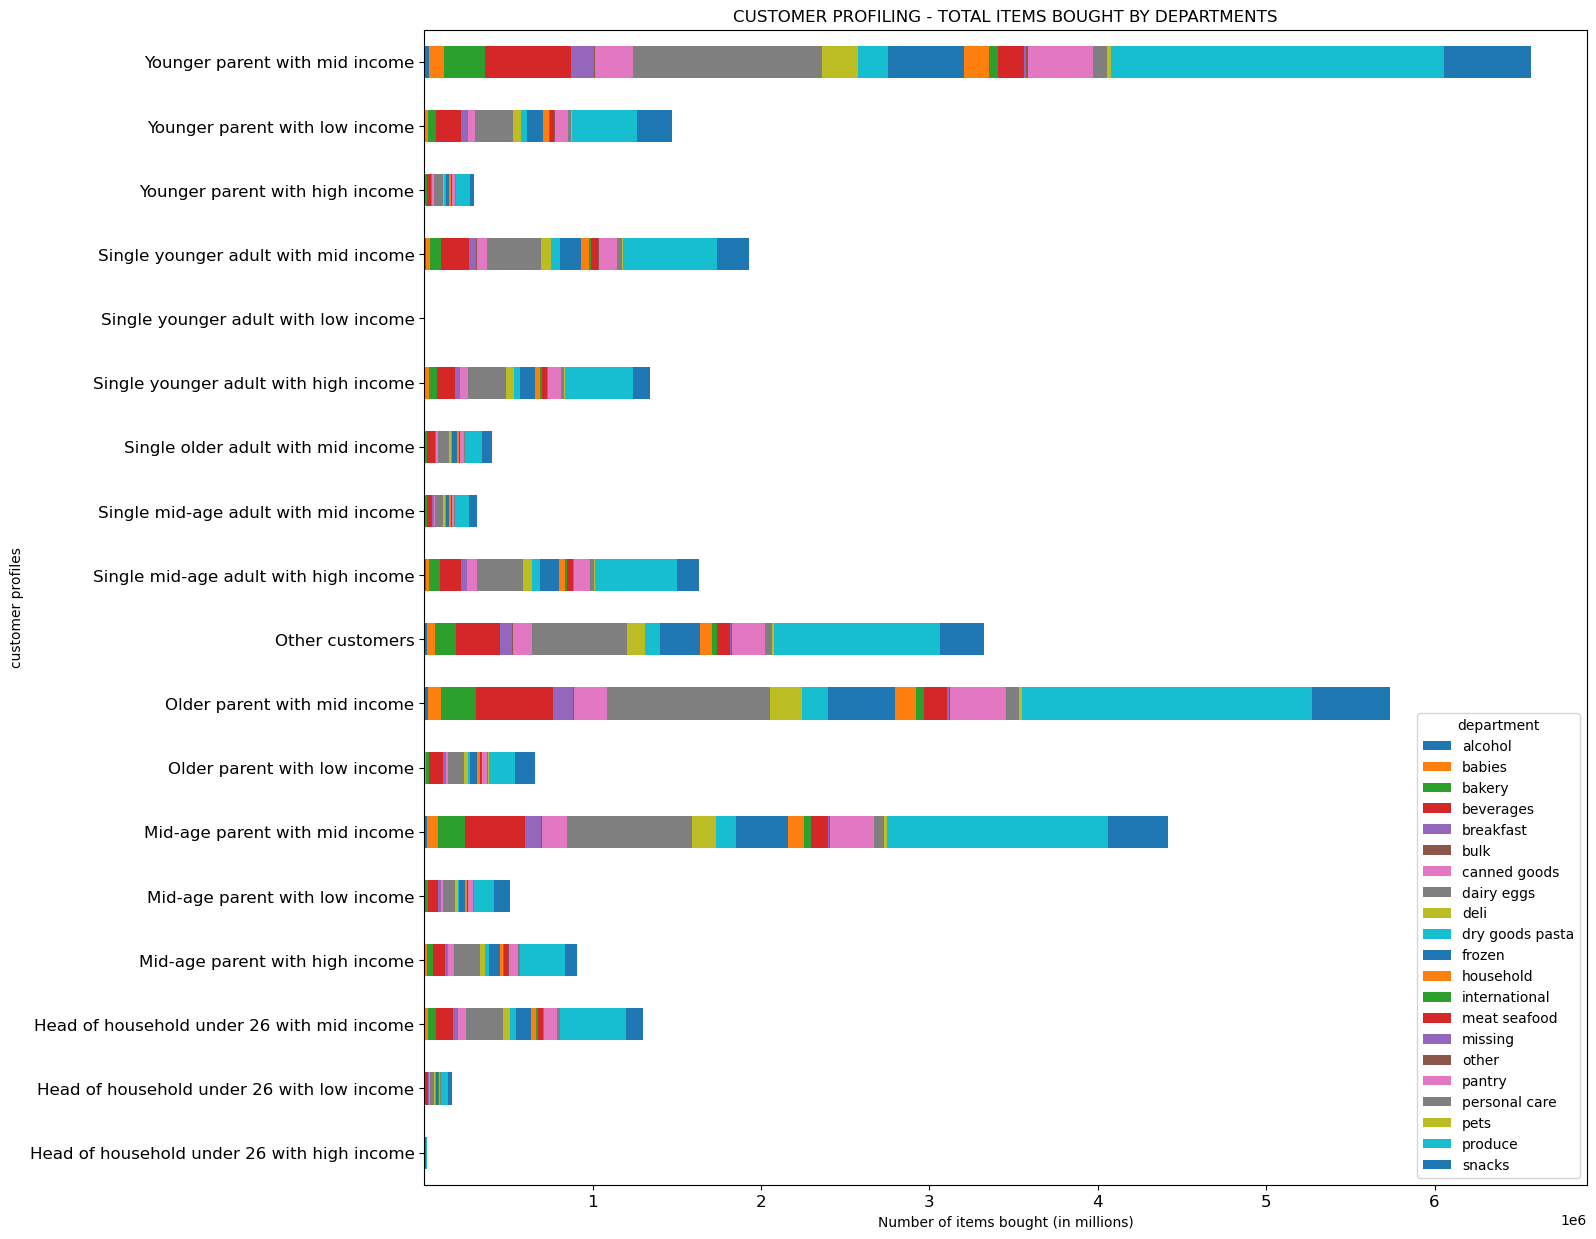

In [19]:
bar_items_cust_departm = crosstab2.plot.barh(stacked = True, figsize = (15, 15), fontsize = 12, rot = 0, title = 'CUSTOMER PROFILING - TOTAL ITEMS BOUGHT BY DEPARTMENTS', xlabel = 'Number of items bought (in millions)', ylabel = 'customer profiles')

In [20]:
# Save bar chart as png
bar_items_cust_departm.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_items_customer_departm.png'), bbox_inches = 'tight')

#### Comment: Chart above shows that most items bought for almost all groups of customers comes from departments: produce, dairy eggs, frozen, beverages, pantry and snacks. Groups that represent parents tend to buy more produce and dairy eggs items then others (proportionaly to all the items they bought)

# 5. Produce suitable charts to illustrate your results
## (Additional charts needed to answer key bussiness questions)

### Key question 3: bar chart for frequency of items with different price range (use 'price_range')

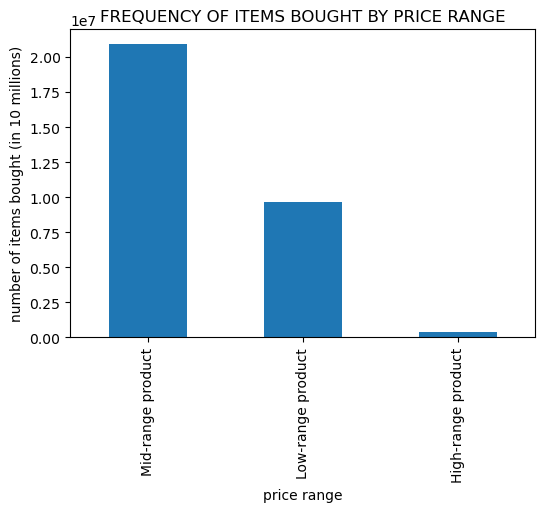

In [21]:
# Create bar chart
bar_price_range = df_all['price_range'].value_counts().plot.bar(figsize = (6, 4), title = 'FREQUENCY OF ITEMS BOUGHT BY PRICE RANGE', xlabel = 'price range', ylabel = 'number of items bought (in 10 millions)')

In [22]:
# Save object bar_price_range as image file
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'), bbox_inches = 'tight')

### Key question 4: bar chart for frequency of items by department (use column 'department')

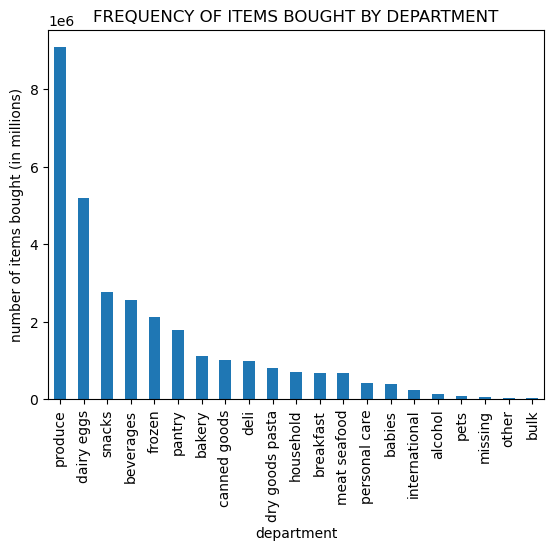

In [23]:
# Create bar chart
bar_dep_freq = df_all['department'].value_counts().plot.bar(title = 'FREQUENCY OF ITEMS BOUGHT BY DEPARTMENT', xlabel = 'department', ylabel = 'number of items bought (in millions)')

In [24]:
# Save object bar_dep_freq as image file
bar_dep_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_freq.png'), bbox_inches = 'tight')

### Key question 5(b) : stacked bar chart for ordering habits based on loyalty (use 'department' and 'loyalty_flag')

In [25]:
# Create crosstab for columns 'loyalty_flag' and 'department'
crosstab3 = pd.crosstab(df_all['loyalty_flag'], df_all['department'])

In [26]:
crosstab3

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,38726,167108,381686,855024,223866,13834,294594,1835676,324046,242580,...,196873,78394,202481,18350,10715,560452,123382,25470,3147376,943150
New customer,28647,46708,172636,396658,107357,4149,180196,752101,158335,144836,...,128118,43841,112466,12713,5839,299632,75458,15881,1336607,413107
Regular customer,77301,196576,570704,1320252,346872,15468,537284,2604051,521453,434720,...,374867,133756,359838,33705,17857,922819,225575,51714,4595293,1410149


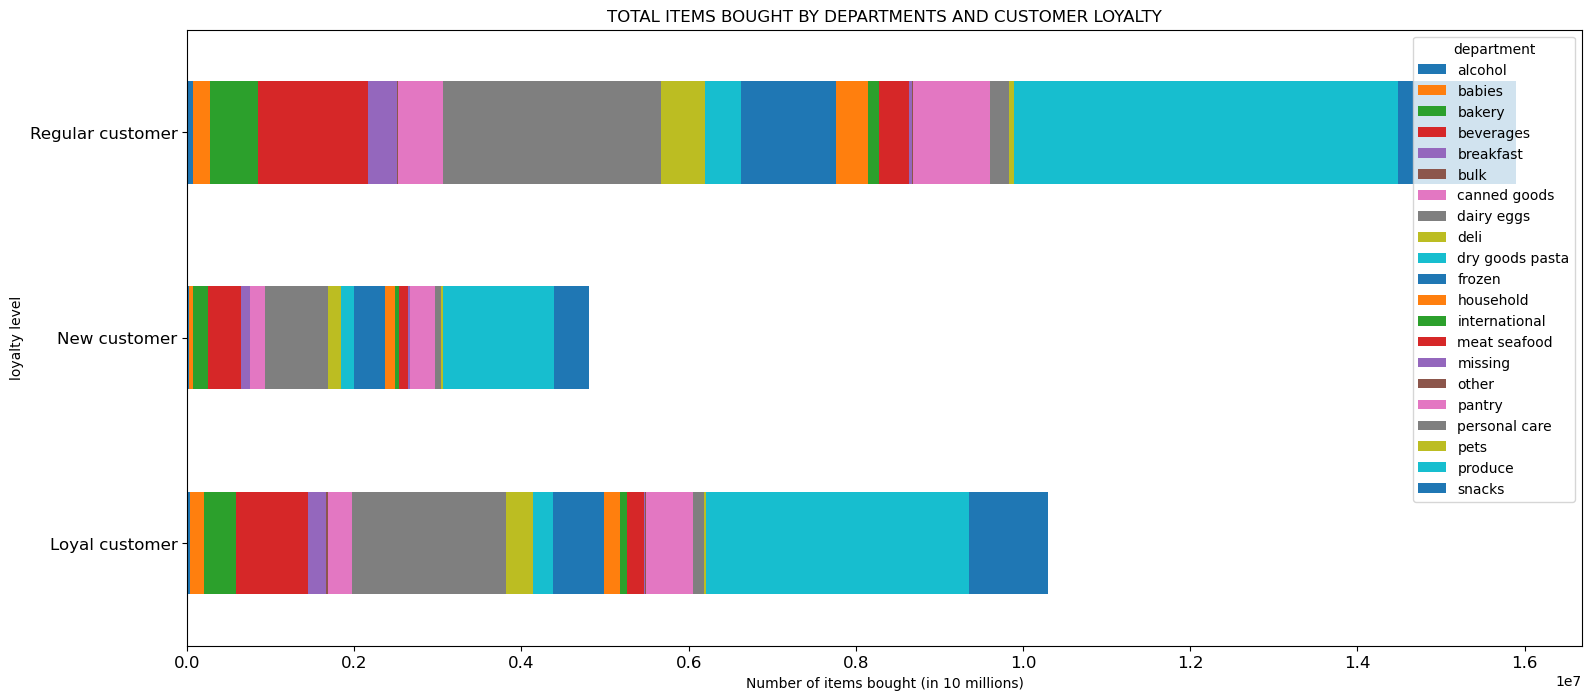

In [45]:
# Create stacked bar chart
bar_dep_loyalty = crosstab3.plot.barh(stacked = True, figsize = (18, 8), fontsize = 12, rot = 0, title = 'TOTAL ITEMS BOUGHT BY DEPARTMENTS AND CUSTOMER LOYALTY', xlabel = 'Number of items bought (in 10 millions)', ylabel = 'loyalty level')

In [46]:
# Save object bar_dep_loyalty as png
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'), bbox_inches = 'tight')

### Key question 5. (c): bar chart for ordering habbits bu regions (use 'region')

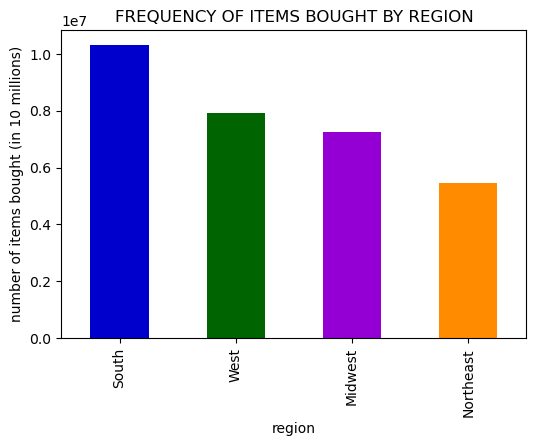

In [31]:
# Create bar chart
bar_region = df_all['region'].value_counts().plot.bar(color = ['mediumblue', 'darkgreen', 'darkviolet', 'darkorange'], figsize = (6, 4), title = 'FREQUENCY OF ITEMS BOUGHT BY REGION', xlabel = 'region', ylabel = 'number of items bought (in 10 millions)')

In [47]:
# Save object bar_region as image file
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'), bbox_inches = 'tight')

### Key question 5.(d): stacked bar chart for family status and age in terms of ordering habbits (use 'marital_status' and 'age_group')

In [34]:
# Create crosstab for columns 'loyalty_flag' and 'department'
crosstab4 = pd.crosstab(df_all['marital_status'], df_all['age_group'])

In [35]:
crosstab4

age_group,Middle-age adult,Older adult,Young adult,Youth
marital_status,,,,
divorced/widowed,112221,2535540,0,0
living with parents and siblings,0,0,0,1482611
married,5838223,7586073,6907275,1431450
single,1829940,0,2315226,954105


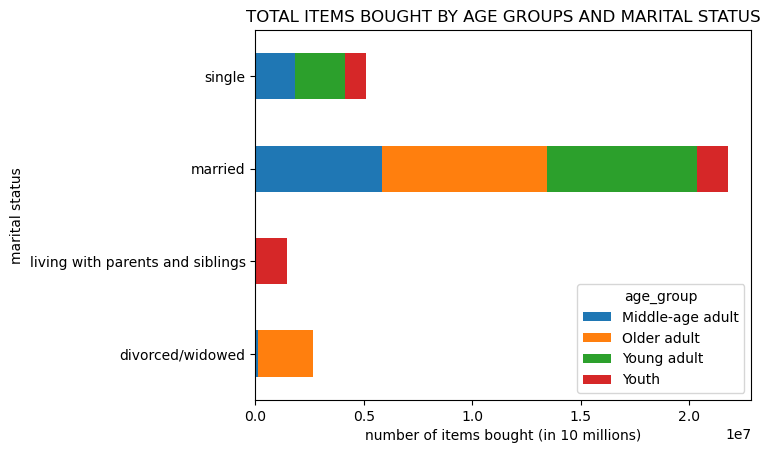

In [44]:
# Create stacked bar chart
bar_marital_age_gr = crosstab4.plot.barh(stacked = True, rot = 0, title = 'TOTAL ITEMS BOUGHT BY AGE GROUPS AND MARITAL STATUS', xlabel = 'number of items bought (in 10 millions)', ylabel = 'marital status')

In [48]:
# Save object bar_dep_loyalty as png
bar_marital_age_gr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_age_gr.png'), bbox_inches = 'tight')

# 6. Export data

In [50]:
# Export df-all as pikle format
df_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_final.pkl'))